In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/sales_data.csv") #Loading Local CSV

In [3]:
display(df.head()) 

,order_id,product,category,quantity,price,order_date,customer_id,region
0,1,Cadeira,Acessórios,3,1062.33,2023-01-01,1046,Sul
1,2,Monitor,Acessórios,1,827.34,2023-01-02,1011,Leste
2,3,Teclado,Acessórios,1,498.82,2023-01-03,1061,Leste
3,4,Cadeira,Acessórios,4,1230.00,2023-01-04,1079,Leste
4,5,Tablet,Eletrônicos,3,1042.86,2023-01-05,1087,Leste


In [4]:
# General Information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     500 non-null    int64  
 1   product      500 non-null    object 
 2   category     500 non-null    object 
 3   quantity     500 non-null    int64  
 4   price        500 non-null    float64
 5   order_date   500 non-null    object 
 6   customer_id  500 non-null    int64  
 7   region       500 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 31.4+ KB
None
         order_id    quantity        price  customer_id
count  500.000000  500.000000   500.000000   500.000000
mean   250.500000    2.476000   748.829600  1050.430000
std    144.481833    1.150683   413.965448    29.493471
min      1.000000    1.000000    56.720000  1000.000000
25%    125.750000    1.000000   382.190000  1024.750000
50%    250.500000    2.000000   734.145000  1049.500000
75%    375.25000

In [5]:
print(df.isna().sum()) #Verifying Null Values

order_id       0
product        0
category       0
quantity       0
price          0
order_date     0
customer_id    0
region         0
dtype: int64


In [6]:
df["total"] = df["quantity"] * df["price"] #Creates a new total column, which is the revenue for each row (quantity × price)

In [7]:
display(df.head())

,order_id,product,category,quantity,price,order_date,customer_id,region,total
0,1,Cadeira,Acessórios,3,1062.33,2023-01-01,1046,Sul,3186.99
1,2,Monitor,Acessórios,1,827.34,2023-01-02,1011,Leste,827.34
2,3,Teclado,Acessórios,1,498.82,2023-01-03,1061,Leste,498.82
3,4,Cadeira,Acessórios,4,1230.00,2023-01-04,1079,Leste,4920.00
4,5,Tablet,Eletrônicos,3,1042.86,2023-01-05,1087,Leste,3128.58


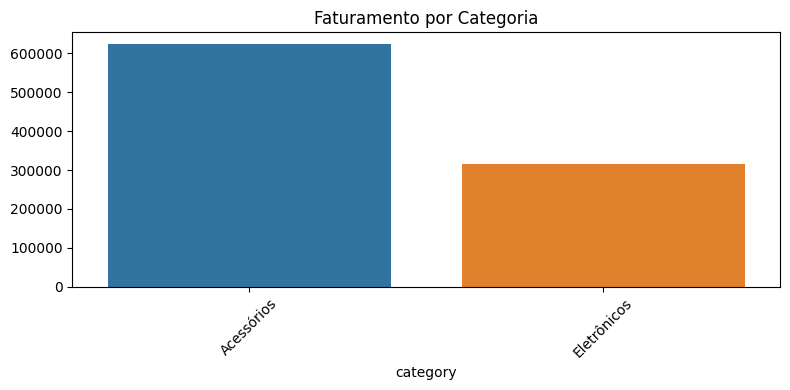

In [8]:
# Billing by category - Groups data by category and adds up the total, ordering from highest to lowest revenue
category_revenue = df.groupby("category")["total"].sum().sort_values(ascending=False)
# Cria gráfico de barras com o faturamento por categoria
plt.figure(figsize=(8, 4))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Faturamento por Categoria")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

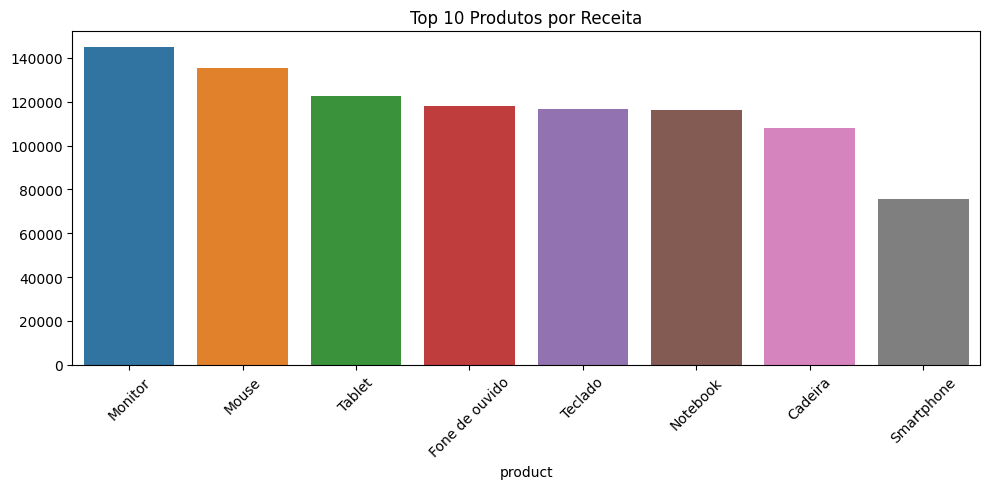

In [9]:
# Top produtos - Calculates the 10 highest-grossing products
top_products = df.groupby("product")["total"].sum().sort_values(ascending=False).head(10)
# Plot a bar graph with the 10 highest-grossing products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Produtos por Receita")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

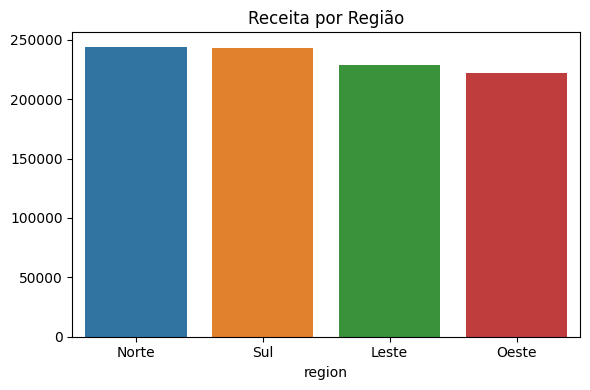

In [10]:
# Revenue by Region - Groups revenue by region
region_revenue = df.groupby("region")["total"].sum().sort_values(ascending=False)
# Generates graph with total revenue by region
plt.figure(figsize=(6, 4))
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.title("Receita por Região")
plt.tight_layout()
plt.show()

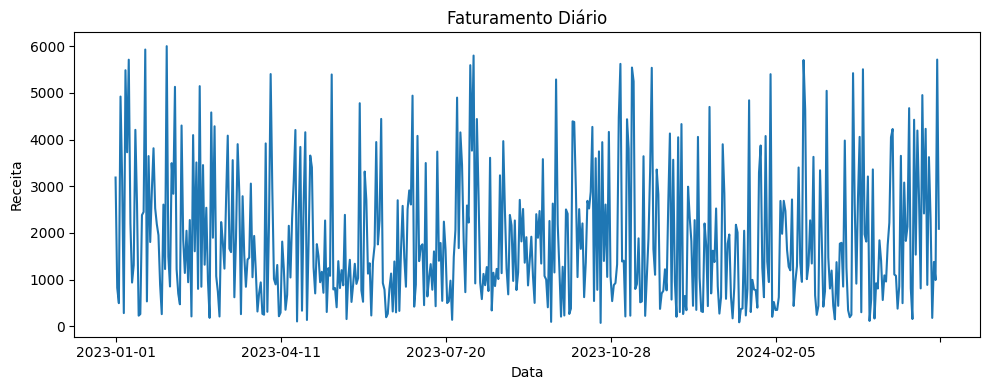

In [11]:
# Daily Evolution - Groups billing by date
daily_revenue = df.groupby("order_date")["total"].sum()
# Generate a line graph showing how revenue has evolved over time
plt.figure(figsize=(10, 4))
daily_revenue.plot()
plt.title("Faturamento Diário")
plt.xlabel("Data")
plt.ylabel("Receita")
plt.tight_layout()
plt.show()